<a href="https://colab.research.google.com/github/srehaag/legal_info_tech_w26/blob/main/Solutions_Module3_Assignment_w26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Module 3: Assignment

### Instructions

There isn't usually just one way to solve a coding problem. This notebook offers some examples of how you might approach the assignment questions -- but these are not the only possible approaches.

Recall that students receive a high pass if they make a meaningful effort to complete the module. Pass grades are where students mostly complete the assignment but should have put more effort into the assignment. And fail is where the assignment is not mostly complete and insufficient effort was put into the assignment.

If you would like further feedback on your completed assignment, including invidivualized feedback on your coding, please drop in during the "Study with me" sessions, or reach out by email.

### Beginner Question 1:

Using the [Social Security Tribunal dataset](https://huggingface.co/datasets/a2aj/canadian-case-law) from A2AJ, print the names of the five earliest Social Security Tribunal cases in the dataset.

In [1]:
from datasets import load_dataset
import pandas as pd

ds = load_dataset("a2aj/canadian-case-law", split = "train", data_dir = "SST")
df = pd.DataFrame(ds)

df.sort_values(by = "document_date_en", ascending = True).head(5).name_en

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,name_en
73,Canada Employment Insurance Commission v. J. M.
8719,K.O. v. Minister of Human Resources and Skills...
8707,M. C. M. v. Minister of Human Resources and Sk...
8697,Canada Employment Insurance Commission and L. ...
6965,T. H. v. Canada Employment Insurance Commission


In [2]:
# Alternative approach that considers both FR and EN cases
# Credit to Mia Cox

from datasets import load_dataset

ds = load_dataset("a2aj/canadian-case-law", data_dir = "SST", split="train")
df = ds.to_pandas()

# since english and french docs are dated separately in the dataset, pick the oldest of the two (or more realistically, whichever one exists) and put it in a unified column
df["unified_date"] = df[["document_date_en", "document_date_fr"]].min(axis=1)

# sort by this unified date
oldestCases = df.sort_values("unified_date")

for x in range(5):
    # print the english name if available; if not, print the french name
    print(oldestCases["name_en"].values[x] if oldestCases["name_en"].values[x] else oldestCases["name_fr"].values[x])

Canada Employment Insurance Commission v. J. M.
K.O. v. Minister of Human Resources and Skills Development
M. C. M. v. Minister of Human Resources and Skills Development
Canada Employment Insurance Commission and L. K. (R.)
T. H. v. Canada Employment Insurance Commission


### Beginner Question 2:

Using the [Canadian Human Rights Tribunal dataset](https://huggingface.co/datasets/a2aj/canadian-case-law) from the A2AJ, make a line chart with the average number Canadian Human Rights Tribunal decisions per year over the past 10 years.

Generating train split: 0 examples [00:00, ? examples/s]

<Axes: xlabel='year'>

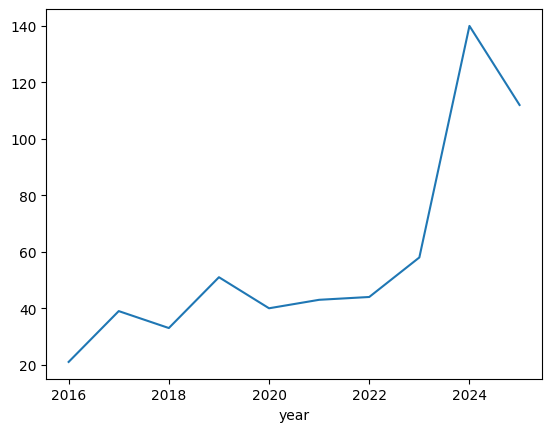

In [3]:
from datasets import load_dataset
import pandas as pd

ds = load_dataset("a2aj/canadian-case-law", split = "train", data_dir = "CHRT")
df = pd.DataFrame(ds)

df["year"] = pd.to_datetime(df["document_date_en"]).dt.year
df[df["year"].between(2016, 2025)].groupby("year").size().plot()



### Beginner Question 3:

Using the A2AJ's [Canadian Case Law](https://huggingface.co/datasets/a2aj/canadian-case-law) dataset, pick two courts/tribunals, and create line charts for the number of words per decision per year for the past five years for each of the two courts/tribunals. What is the most interesting change over this time that you observe?


In [4]:
from datasets import load_dataset
import pandas as pd

# pick the courts
dataset1 = "ONCA"
dataset2 = "BCCA"

# Load two courts/tribunals
court1 = pd.DataFrame(load_dataset("a2aj/canadian-case-law", split="train", data_dir=dataset1))
court2 = pd.DataFrame(load_dataset("a2aj/canadian-case-law", split="train", data_dir=dataset2))

# Add year and word count cols
court1["year"] = pd.to_datetime(court1["document_date_en"]).dt.year
court1["word_count"] = court1["unofficial_text_en"].str.split().str.len()

court2["year"] = pd.to_datetime(court2["document_date_en"]).dt.year
court2["word_count"] = court2["unofficial_text_en"].str.split().str.len()

# Get average words per decision per year for past 5 years
court1_avg = court1[court1["year"].between(2022, 2026)].groupby("year")["word_count"].mean()
court2_avg = court2[court2["year"].between(2022, 2026)].groupby("year")["word_count"].mean()

ONCA/train.parquet:   0%|          | 0.00/134M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

<Axes: title={'center': 'Court 1 (ONCA) - Avg Words per Decision'}, xlabel='year'>

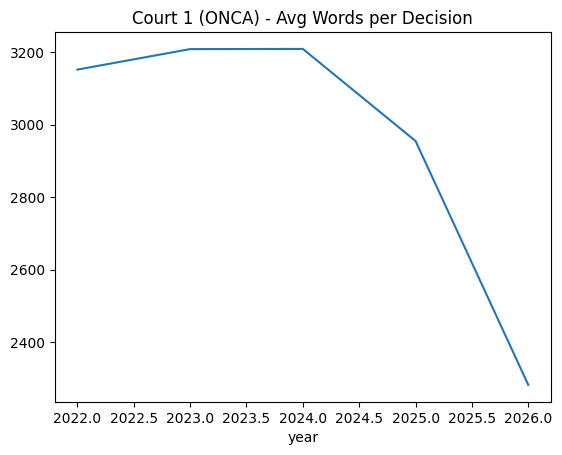

In [5]:
# Show first line chart
court1_avg.plot(title=f"Court 1 ({dataset1}) - Avg Words per Decision")


<Axes: title={'center': 'Court 2 (BCCA) - Avg Words per Decision'}, xlabel='year'>

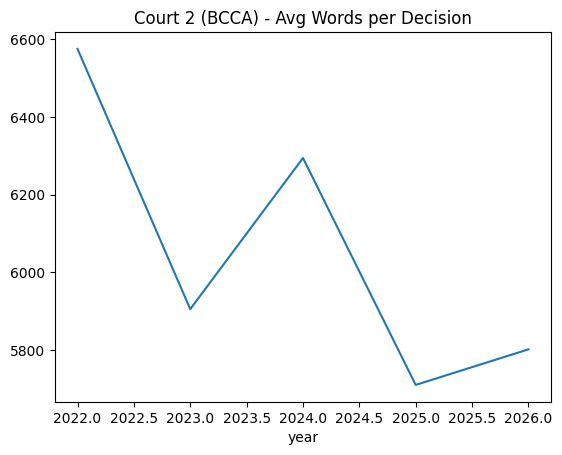

In [6]:
# Show second line chart
court2_avg.plot(title=f"Court 2 ({dataset2}) - Avg Words per Decision")

### Intermediate Question 1:

Using the [Tax Court of Canada dataset](https://huggingface.co/datasets/a2aj/canadian-case-law) from A2AJ, print the names of the five Tax Court of Canada cases that have most frequently been cited by the Tax Court of Canada over the past 10 years.

Hint: neutral citations follow specific patterns (e.g. YYYY TCC #).

In [7]:
from datasets import load_dataset
import pandas as pd
import re

# Load dataset
df = pd.DataFrame(load_dataset("a2aj/canadian-case-law", split="train", data_dir="TCC"))

# Add year col and filter for past 10 years
df["year"] = pd.to_datetime(df["document_date_en"]).dt.year
df_recent = df[df["year"].between(2017, 2026)]

# Extract citations from decision text (YYYY TCC ###)
def extract_tcc_citations(text):
    if pd.isna(text):
        return []
    return re.findall(r'\d{4} TCC \d+', text)

# Get all citations from recent decisions
citations = df_recent["unofficial_text_en"].apply(extract_tcc_citations).explode()

# Count citation frequency and get top 5
top_5_citations = citations.value_counts().head(5)

# Print results
print("Top 5 most cited TCC cases (2017-2026)")
for citation, count in top_5_citations.items():
    name = df[df["citation_en"] == citation]["name_en"].values[0]
    print(f"{citation}: {name} ({count} citations)")

Top 5 most cited TCC cases (2017-2026)
2013 TCC 380: Torres v. The Queen (30 citations)
2012 TCC 273: Velcro Canada Inc. v. The Queen (29 citations)
2015 TCC 92: Invesco Canada Ltd. v. The Queen (28 citations)
2018 TCC 55: MacDonald v. The Queen (25 citations)
2009 TCC 334: Nichols v. The Queen (24 citations)


In [8]:
# Alternative approach with different results because
# it calculates 10 years from today's date
# rather than based on calendar years

from datasets import load_dataset
import pandas as pd
import re

# Load dataset and filter to past 10 years from today
df = pd.DataFrame(load_dataset("a2aj/canadian-case-law", split="train", data_dir="TCC"))
df["date"] = pd.to_datetime(df["document_date_en"])
df_recent = df[df["date"] >= pd.Timestamp.now(tz="UTC") - pd.DateOffset(years=10)]

# Extract and count TCC citations, get top 5
top_5 = (
    df_recent["unofficial_text_en"]
    .apply(lambda x: re.findall(r'\d{4} TCC \d+', x or ''))
    .explode()
    .value_counts()
    .head(5)
)

# Print results
print("Top 5 most cited TCC cases (past 10 years)")
for cite, count in top_5.items():
    print(f"{cite}: {df.loc[df['citation_en'] == cite, 'name_en'].values[0]} ({count} citations)")

Top 5 most cited TCC cases (past 10 years)
2013 TCC 380: Torres v. The Queen (45 citations)
2012 TCC 273: Velcro Canada Inc. v. The Queen (32 citations)
2015 TCC 92: Invesco Canada Ltd. v. The Queen (30 citations)
2005 TCC 545: DeCosta v. The Queen (28 citations)
2009 TCC 334: Nichols v. The Queen (28 citations)


In [9]:
# alternative approach that considers both French and English
# Credit to Tori Shin-Deng (with revisions)

from datasets import load_dataset
import pandas as pd

df = load_dataset("a2aj/canadian-case-law", data_dir="TCC", split="train").to_pandas()

# Add year col and filter for past 10 years
df["year"] = pd.to_datetime(df["document_date_en"]).dt.year
df_recent = df[df["year"].between(2017, 2026)].copy()

pattern = r"\d{4}\s+(?:TCC|CCI)\s+\d+"
df_recent["text"] = df_recent["unofficial_text_en"].combine_first(df_recent["unofficial_text_fr"])
df_recent["cited"] = df_recent["text"].str.findall(pattern)

citation_count = {}
for index, row in df_recent.iterrows():
    citations = row["cited"]
    for citation in citations:
        if citation not in citation_count:
            citation_count[citation] = 1
        else:
            citation_count[citation] += 1

def get_count(row):
    citation_en = row["citation_en"]
    citation_fr = row["citation_fr"]
    count = 0
    if citation_en in citation_count:
        count = count + citation_count[citation_en]
    if citation_fr in citation_count:
        count = count + citation_count[citation_fr]
    return count

df["num_cited"] = df.apply(get_count, axis=1)
df.sort_values("num_cited", ascending=False).head(5).filter(items=["name_en", "name_fr", "num_cited"])

,name_en,name_fr,num_cited
3396,Torres v. The Queen,Torres c. La Reine,30
3933,Velcro Canada Inc. v. The Queen,Velcro Canada Inc. c. La Reine,29
4415,Invesco Canada Ltd. v. The Queen,Invesco Canada Ltd. c. La Reine,28
5348,MacDonald v. The Queen,MacDonald c. La Reine,25
5214,Mariano v. The Queen,Mariano c. La Reine,24


### Intermediate Question 2:

Load into a dataframe the excel data that reports tabular data about Supreme Court of Canada decisions discussed in the Module 2 videos available at this URL:

    https://litigate.com/assets/uploads/20230823-140809-6601-SCC-Database-v-2023.01.xlsx

For the meaning of the values of codes in the excel data, see the coding manual [here](https://litigate.com/assets/uploads/20220216-111705-4622-Lenczner-Slaght-Supreme-Court-of-Canada-Database-Coding-Manual-v-2022.01.pdf).

Print a list the names of the 5 judges who wrote the largest number of dissenting opinions in the dataset, and then print a bar chart with their names and the number of dissenting opinions in the dataset that each of them wrote.

Do you have any theories as to why these 5 judges in particular wrote the largest number of dissenting opinions?

5 Judges with most dissents:

    justiceName  dissent_count
0  JRCartwright            101
1       BLaskin             98
2         SCôté             89
3       CLHDube             89
4      WFSpence             83


<Axes: xlabel='justiceName'>

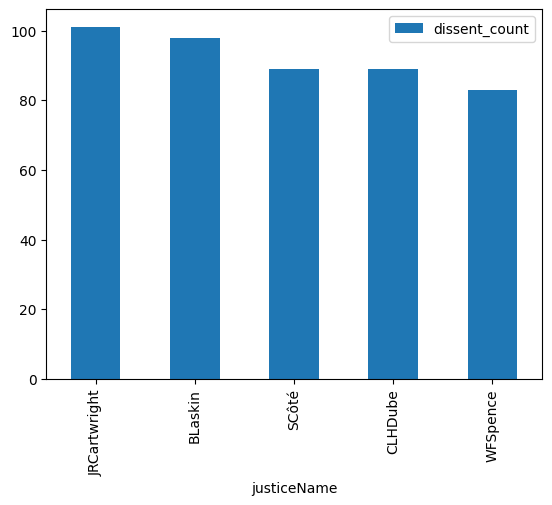

In [10]:
import pandas as pd

# Load SCC case data from online spreadsheet
url = "https://litigate.com/assets/uploads/20230823-140809-6601-SCC-Database-v-2023.01.xlsx"
cases_df = pd.read_excel(url)

# Load justice names lookup table
justices_df = pd.read_excel(url, sheet_name="JusticesPresent")

# Remove duplicate justice entries
justices_df = justices_df.drop_duplicates(subset='justiceID')

# Get list of judges and dissent writing counts
dissent_writers = cases_df['dissentWriter'].dropna()
dissent_writers = dissent_writers[dissent_writers != 0]
results_df = dissent_writers.value_counts().reset_index()
results_df.columns = ['justiceID', 'dissent_count']

# Convert IDs to same type (both to string)
results_df['justiceID'] = results_df['justiceID'].astype(str)
justices_df['justiceID'] = justices_df['justiceID'].astype(str)

# Add justice names by matching IDs
results_df = results_df.merge(justices_df[['justiceID', 'justiceName']], on='justiceID')

# Sort by dissent count and display top 5
results_df = results_df.sort_values('dissent_count', ascending=False)
print("5 Judges with most dissents:\n")
print(results_df[['justiceName', 'dissent_count']].head(5))

# Bar chart
results_df.head(5).plot(kind='bar', x='justiceName', y='dissent_count')

dissentWriter
JRCartwright    101
BLaskin          98
SCôté            89
CLHDube          89
WFSpence         83
dtype: int64


<Axes: xlabel='dissentWriter'>

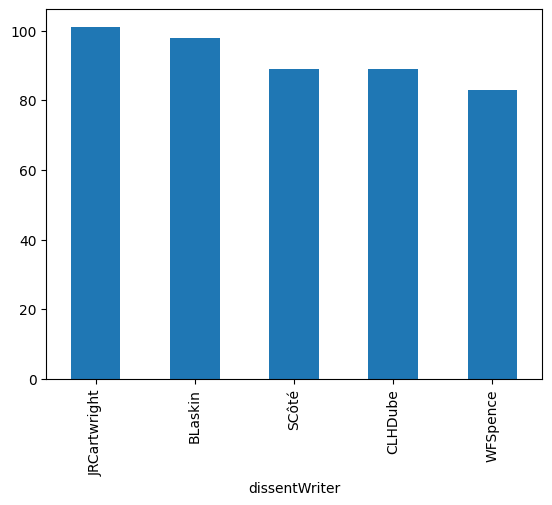

In [11]:
#Alternative Approach using groupby

import pandas as pd

# Load data
url = "https://litigate.com/assets/uploads/20230823-140809-6601-SCC-Database-v-2023.01.xlsx"
df = pd.read_excel(url)
justices = pd.read_excel(url, sheet_name="JusticesPresent")

# Create ID-to-name mapping
name_map = justices.drop_duplicates('justiceID').set_index('justiceID')['justiceName']

# Count dissents and map names
results = (df[df["dissentWriter"] != 0]
         .groupby("dissentWriter").size()
         .sort_values(ascending=False)
         .head(5)
         .rename(index=name_map))

print(results)
results.plot(kind='bar')

### Advanced Question 1:

Using the datasets for Intermediate Questions 1 and 2, print out the names of the 10 Supreme Court judges with the most citations by the Tax Court of Canada since 2010. For simplicity, assume that when a case is cited by the Tax Court of Canada, the Court is citing the majority opinion.

In [12]:
# credit to Chong Tang

import pandas as pd
from datasets import load_dataset
import re
from collections import Counter

print("🚀 Step 1: Building SCC Reference Dictionary...")
scc_url = "https://litigate.com/assets/uploads/20230823-140809-6601-SCC-Database-v-2023.01.xlsx"

try:
    df_justices = pd.read_excel(scc_url, sheet_name='JusticesPresent')

    judge_map = df_justices.drop_duplicates(subset=['justiceID']).set_index('justiceID')['justiceName'].to_dict()

    print(f"✅ Judge Map Created: Found {len(judge_map)} unique judges.")

    df_cases = pd.read_excel(scc_url, sheet_name='Case')

    citation_to_author = {}

    for idx, row in df_cases.iterrows():
        cit = str(row['neutralCitation']).strip()

        writer_id = row['majorityWriter']

        if pd.notna(cit) and pd.notna(writer_id):
            writer_name = judge_map.get(writer_id, "Unknown Judge")
            citation_to_author[cit] = writer_name

    print(f"📚 Dictionary Ready! Indexed {len(citation_to_author)} SCC cases.")

except Exception as e:
    print(f"❌ Error in Step 1: {e}")
    citation_to_author = {}

if citation_to_author:
    print("\n🚀 Step 2: Mining Tax Court (TCC) Data...")

    ds_tcc = load_dataset("a2aj/canadian-case-law", data_dir="TCC", split="train")
    df_tcc = ds_tcc.to_pandas()

    df_tcc['date'] = pd.to_datetime(df_tcc['document_date_en'], errors='coerce')
    df_tcc_recent = df_tcc[df_tcc['date'].dt.year >= 2010]

    print(f"Analyzing {len(df_tcc_recent)} TCC cases since 2010...")

    author_counts = Counter()

    pattern = r"\b20\d{2}\s+SCC\s+\d+\b"

    for text in df_tcc_recent['unofficial_text_en'].dropna():
        citations_found = re.findall(pattern, str(text))

        for cit in citations_found:
            if cit in citation_to_author:
                judge_name = citation_to_author[cit]
                author_counts[judge_name] += 1
            else:
                pass

    print("\n🏆 Top 10 SCC Judges Cited by Tax Court (Since 2010):")
    print("-" * 50)
    for i, (judge, count) in enumerate(author_counts.most_common(10), 1):
        print(f"#{i:<2} | Judge: {judge:<20} | Citations: {count}")

else:
    print("⚠️ Skipping Step 2 due to failure in Step 1.")

🚀 Step 1: Building SCC Reference Dictionary...
✅ Judge Map Created: Found 58 unique judges.
📚 Dictionary Ready! Indexed 1545 SCC cases.

🚀 Step 2: Mining Tax Court (TCC) Data...
Analyzing 3758 TCC cases since 2010...

🏆 Top 10 SCC Judges Cited by Tax Court (Since 2010):
--------------------------------------------------
#1  | Judge: BMcLachlin           | Citations: 375
#2  | Judge: FIacobucci           | Citations: 289
#3  | Judge: MRothstein           | Citations: 255
#4  | Judge: JCMajor              | Citations: 193
#5  | Judge: LLeBel               | Citations: 166
#6  | Judge: LCharron             | Citations: 71
#7  | Judge: WICBinnie            | Citations: 70
#8  | Judge: TACromwell           | Citations: 70
#9  | Judge: RSAbella             | Citations: 55
#10 | Judge: MBastarache          | Citations: 49
